In [1]:
import pandas as pd
# Our scripts
import sys  
sys.path.insert(0, '../src')
import analysis
import patterns_analysis as pa
%load_ext autoreload
%autoreload 2

## How K_ac patterns affects population structure

#### Produce dataframe of model dynamics with different matrices

In [2]:
size = 4
num = 500
lower, upper = 0.001, 0.01
patterns = ['null', 'ident', 'naive', 'immune', 
            'barbell', 'cycle', 'complete', 'star']
end_time = 200
inits = analysis.make_random_abundances(size, num, lower, upper)
results = pa.analyze(inits,
                     patterns,
                     end_time)
print(results.shape)
results.to_csv('../Data/pattern_analysis.tsv', sep='\t', index=False)
results.head()

pattern:   0%|          | 0/8 [00:00<?, ?it/s]

init:   0%|          | 0/500 [00:00<?, ?it/s]

init:   0%|          | 0/500 [00:00<?, ?it/s]

init:   0%|          | 0/500 [00:00<?, ?it/s]

init:   0%|          | 0/500 [00:00<?, ?it/s]

init:   0%|          | 0/500 [00:00<?, ?it/s]

init:   0%|          | 0/500 [00:00<?, ?it/s]

init:   0%|          | 0/500 [00:00<?, ?it/s]

init:   0%|          | 0/500 [00:00<?, ?it/s]

(4000, 8)


,total,growth_rate,has_grown,euclidian,shannon_index,bray_curtis,init,pattern
0,0.04,0.005588,1.0,0.011798,2.220446e-16,3.330669e-16,0,null
1,0.04,0.004088,1.0,0.010486,-2.220446e-16,1.110223e-16,1,null
2,0.04,0.001619,1.0,0.005476,-4.440892e-16,2.220446e-16,2,null
3,0.04,0.008643,1.0,0.014509,0.000000e+00,1.110223e-16,3,null
4,0.04,0.003622,1.0,0.009486,-2.220446e-16,2.220446e-16,4,null


### Plot ECDF of each Statistic and Matrix

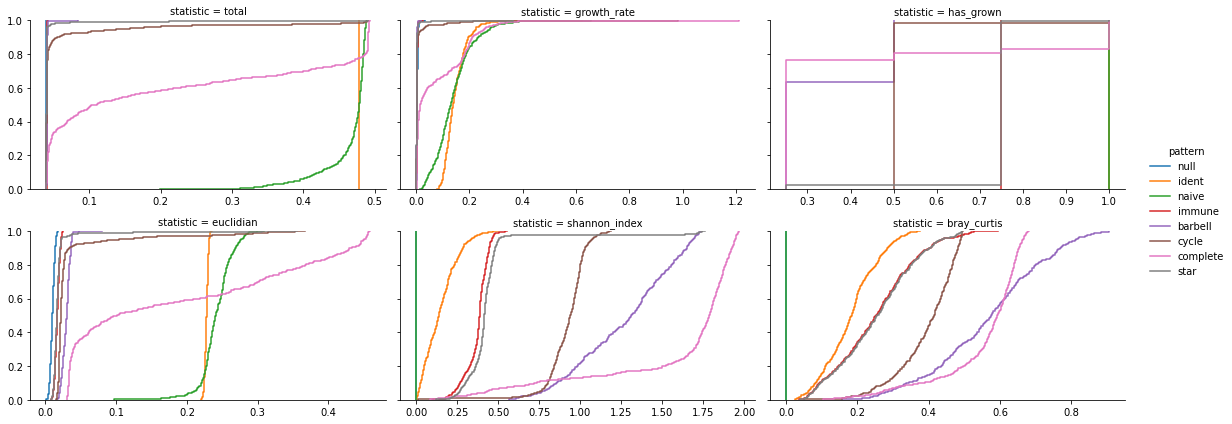

In [4]:
df = pd.read_csv('../Data/pattern_analysis.tsv', sep='\t',
                 dtype={'pattern': 'string'},
                 keep_default_na=False)
pa.plot_ecdf(df, '../Documents/figures/pattern_analysis.png')